<a href="https://colab.research.google.com/github/AlainRossier/datathon-20/blob/master/Datathon_Ravi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATATHON SUMMER 2020

Mounting the Google Drive

In [66]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [101]:
# path to the London file
london_path = '/content/drive/My Drive/Datathon/London/'

In [155]:
# importing the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
intl_df = pd.read_csv(london_path+'UK_international-visits.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [104]:
intl_df.head()

,year,quarter,market,dur_stay,mode,purpose,area,visits,spend,nights,sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,TOTAL ENGLAND,4.431616,1.013484,9.530416,6
1,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
2,2002,January-March,Belgium,1-3 nights,Air,Holiday,REST OF ENGLAND,0.859430,0.044346,2.575960,1
3,2002,January-March,Belgium,1-3 nights,Air,Holiday,SOUTHERN ENGLAND,0.859430,0.044346,2.575960,1
4,2002,January-March,Belgium,1-3 nights,Air,Holiday,SOUTH EAST,0.859430,0.044346,2.575960,1


In [105]:
intl_df_yr = intl_df[intl_df['year'] == 2012]
intl_df_yr.head()

,year,quarter,market,dur_stay,mode,purpose,area,visits,spend,nights,sample
309860,2012,January-March,Belgium,1-3 nights,Air,Holiday,TOTAL ENGLAND,2.535127,0.851227,5.83208,3
309861,2012,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,1.476037,0.517613,3.71390,2
309862,2012,January-March,Belgium,1-3 nights,Air,Holiday,REST OF ENGLAND,1.059090,0.333614,2.11818,1
309863,2012,January-March,Belgium,1-3 nights,Air,Holiday,ENGLAND'S NORTH COUNTRY,1.059090,0.333614,2.11818,1
309864,2012,January-March,Belgium,1-3 nights,Air,Holiday,NORTH WEST,1.059090,0.333614,2.11818,1


In [106]:
intl_df_yr.area.unique()

array(['TOTAL ENGLAND', 'LONDON', 'REST OF ENGLAND',
       "ENGLAND'S NORTH COUNTRY", 'NORTH WEST', 'ALL STAYING VISITS',
       'CENTRAL ENGLAND', 'SOUTHERN ENGLAND', 'NORTH EAST', 'YORKSHIRE',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'SOUTH WEST', 'SOUTH EAST',
       'WALES', ' NORTHERN IRELAND', 'SCOTLAND', 'EAST MIDLANDS',
       ' OIL RIGS/TRAVELLING', ' CHANNEL ISLANDS', ' ISLE OF MAN'],
      dtype=object)

In [107]:
intl_july_aug = intl_df_yr[intl_df_yr['quarter'] == 'July-September']

In [108]:
intl_july_aug.area.unique()

array(['TOTAL ENGLAND', 'LONDON', 'REST OF ENGLAND',
       "ENGLAND'S NORTH COUNTRY", 'NORTH WEST', 'SCOTLAND',
       'ALL STAYING VISITS', 'CENTRAL ENGLAND', 'SOUTHERN ENGLAND',
       'NORTH EAST', 'YORKSHIRE', 'WEST MIDLANDS', 'EAST MIDLANDS',
       'EAST OF ENGLAND', 'SOUTH WEST', 'SOUTH EAST', 'WALES',
       ' CHANNEL ISLANDS', ' NORTHERN IRELAND', ' OIL RIGS/TRAVELLING',
       ' ISLE OF MAN'], dtype=object)

# Exploring the Borough Data Set

## Initial Code

In [202]:
borough_df = pd.read_csv(london_path+'london_earnings_by_borough.csv')

In [203]:
borough_df.dropna(subset=['pay'], inplace=True)

In [218]:
borough_df['identity'] = borough_df['identity'].replace(['Part-time'],['Part-Time'])
borough_df.identity.unique()

array(['Female', 'Full-time', 'Male', 'Part-Time'], dtype=object)

In [205]:
borough_df.pay_type.unique()

array(['Hourly', 'Weekly'], dtype=object)

In [206]:
borough_df = borough_df[borough_df['pay_type']=='Hourly']
borough_df['Average_per_area'] = borough_df.groupby(['area_code','year']).pay.transform('mean')
borough_df.reset_index()

,index,year,area_code,area,identity,pay_type,pay,confidence,Average_per_area
0,7,2009,00AA,City of London,Female,Hourly,17.56,20.0,18.2025
1,10,2012,00AA,City of London,Female,Hourly,23.91,NaN,23.9100
2,12,2014,00AA,City of London,Female,Hourly,16.74,NaN,16.7400
3,13,2015,00AA,City of London,Female,Hourly,16.17,NaN,16.1700
4,15,2017,00AA,City of London,Female,Hourly,22.15,NaN,22.1500
...,...,...,...,...,...,...,...,...,...
3309,5917,2015,926,United Kingdom,Part-time,Hourly,8.47,0.2,11.3600
3310,5918,2016,926,United Kingdom,Part-time,Hourly,8.90,0.3,11.7350
3311,5919,2017,926,United Kingdom,Part-time,Hourly,9.09,0.3,12.0175
3312,5920,2018,926,United Kingdom,Part-time,Hourly,9.35,0.3,12.3300


In [207]:
def process_borough(df,paytype):
  temp_df = df[df['pay_type']== paytype]
  temp_df['Average_per_area'] = temp_df.groupby(['area_code','year']).pay.transform('mean')
  temp_df.reset_index()
  return temp_df

In [208]:
ooaa = borough_df[borough_df['area_code'] == '00AA']

In [209]:
ooaa.sort_values(by=['year'])
ooaa = ooaa.groupby('year').mean()
ooaa.reset_index(inplace=True)

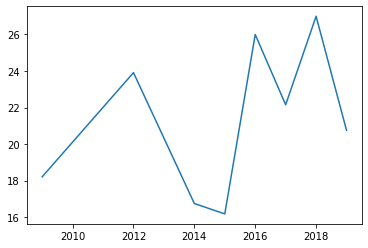

In [210]:
plt.plot(ooaa['year'],ooaa['Average_per_area'])

In [211]:
def area_compress_df(area_code):
  temp_df =  borough_df[borough_df['area_code'] == area_code]
  temp_df.sort_values(by=['year'])
  temp_df = temp_df.groupby('year').mean()
  temp_df.reset_index(inplace=True)
  return temp_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

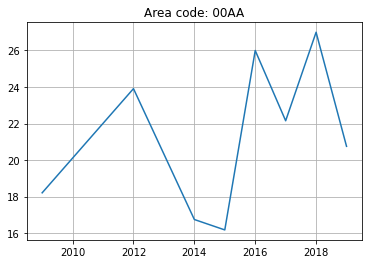

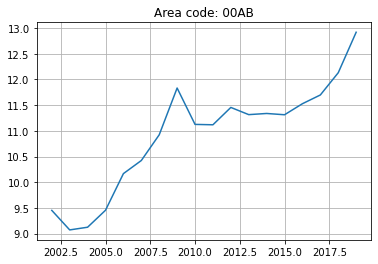

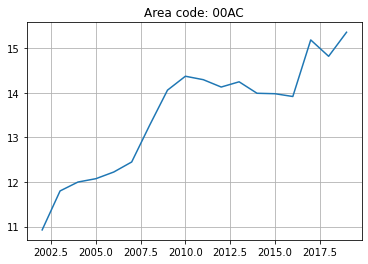

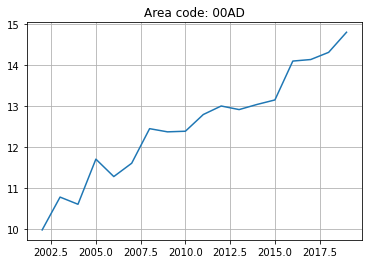

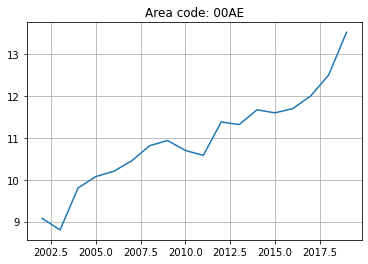

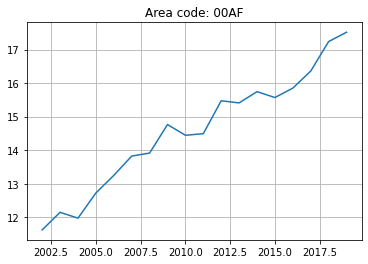

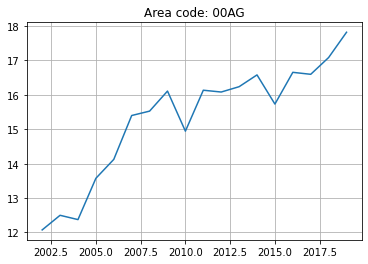

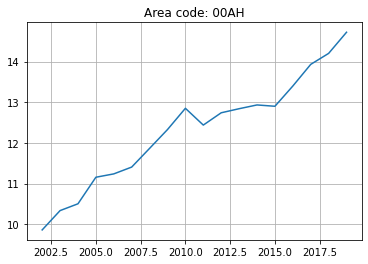

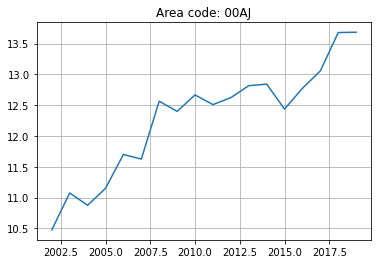

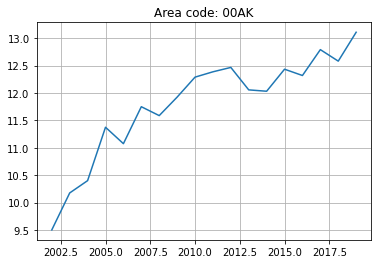

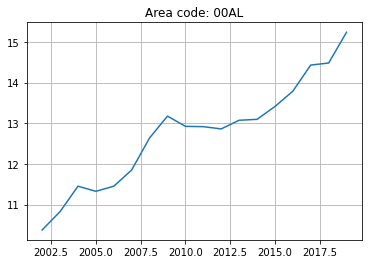

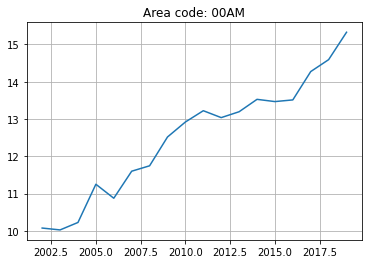

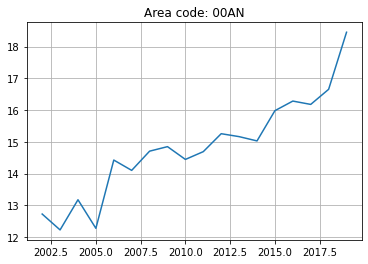

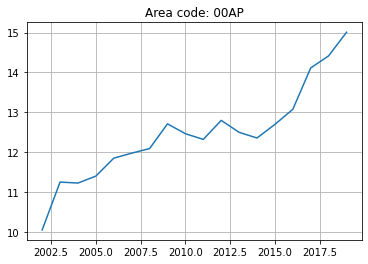

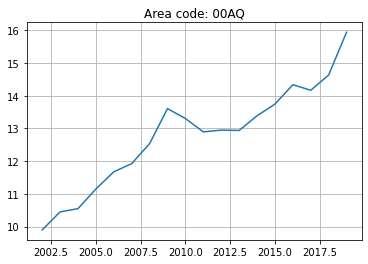

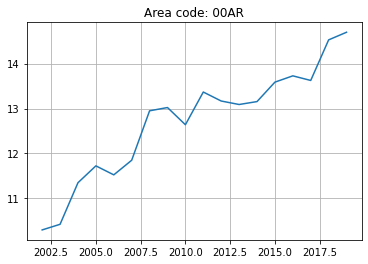

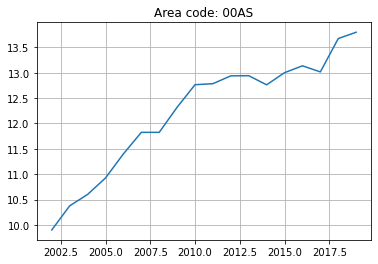

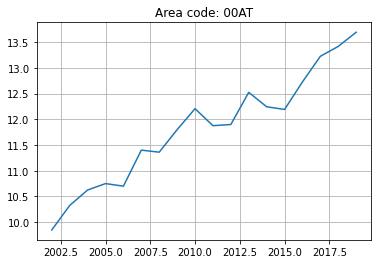

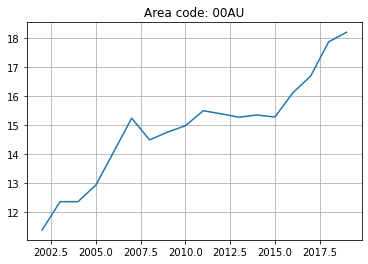

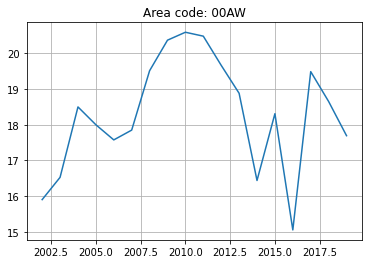

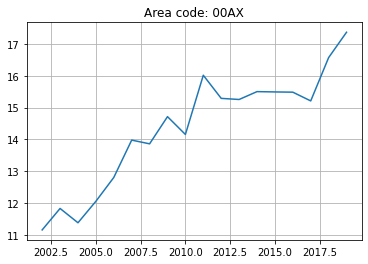

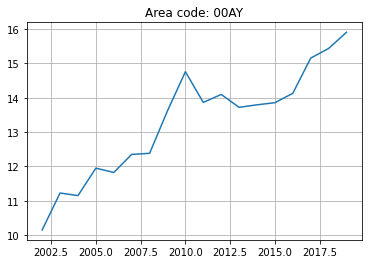

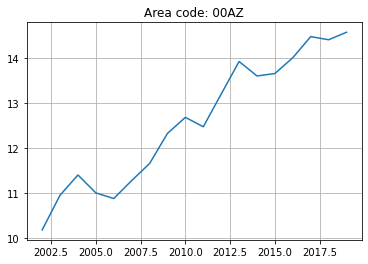

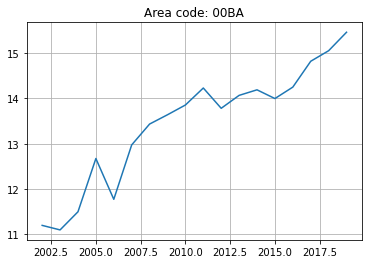

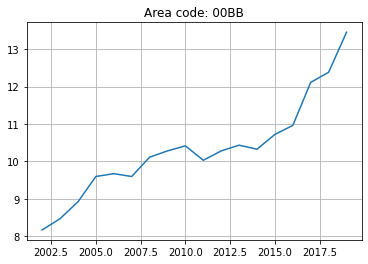

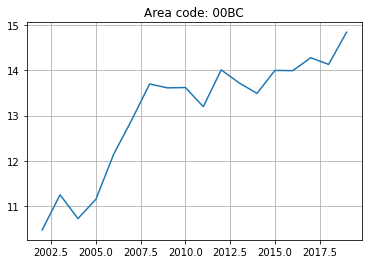

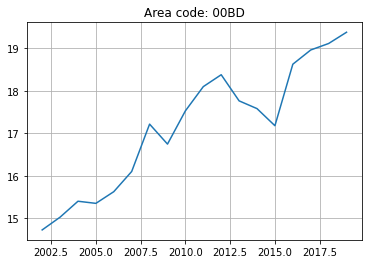

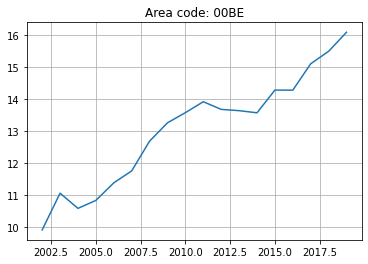

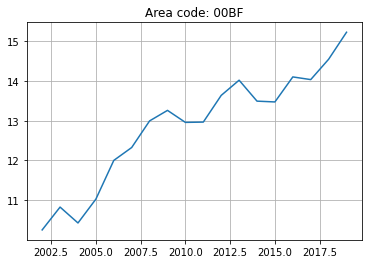

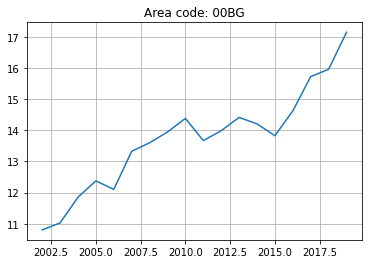

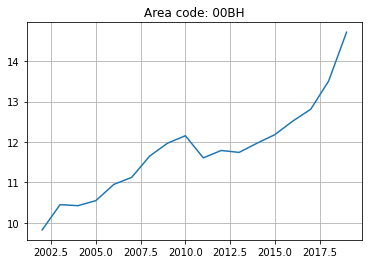

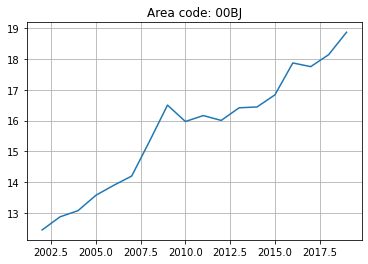

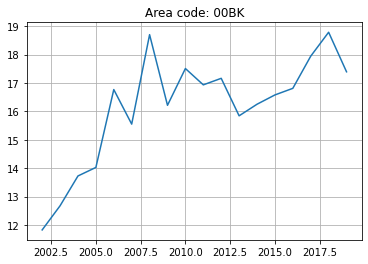

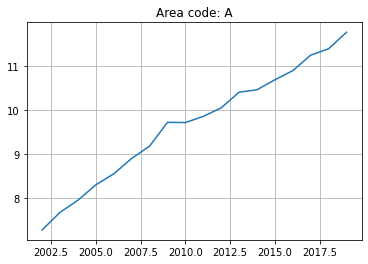

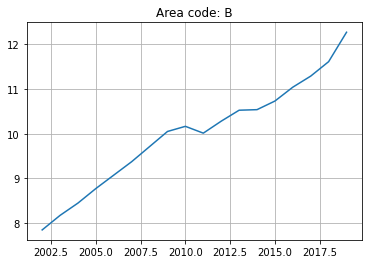

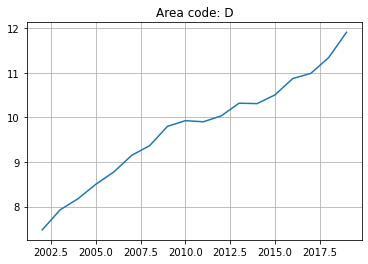

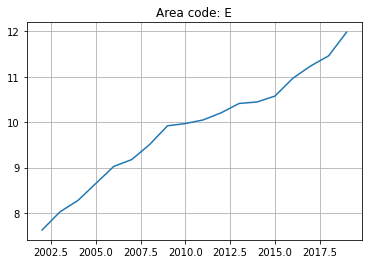

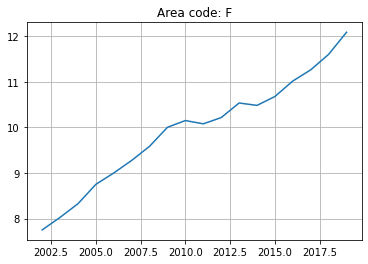

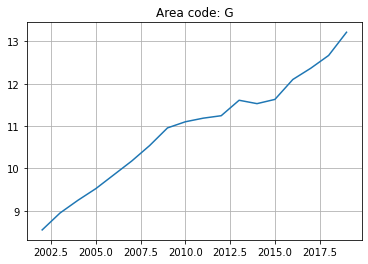

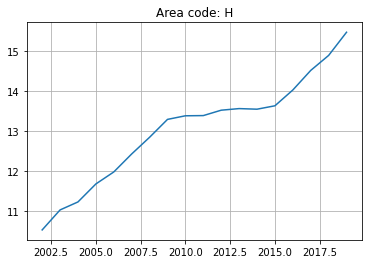

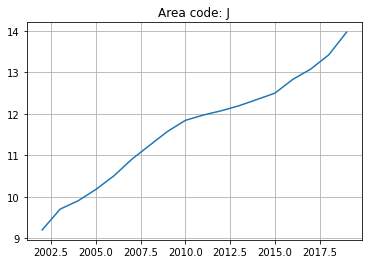

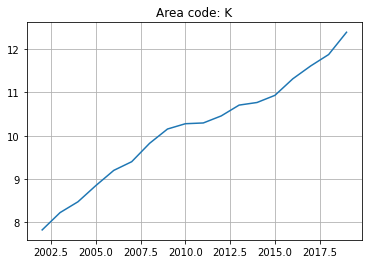

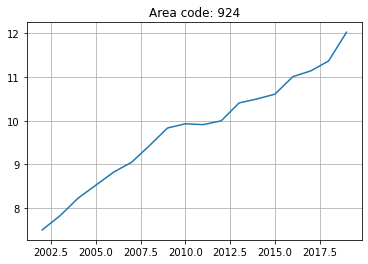

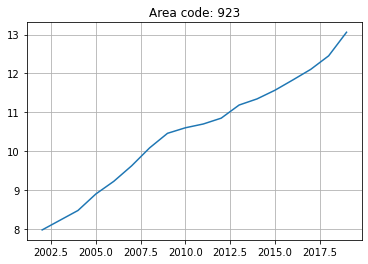

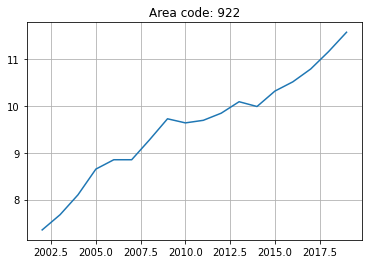

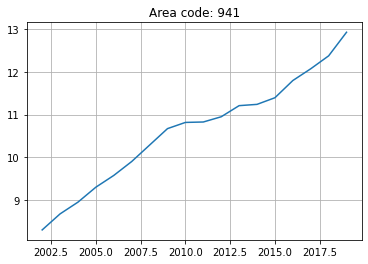

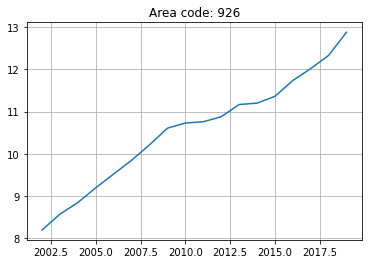

In [212]:
for i in borough_df.area_code.unique():
  k = area_compress_df(i)
  plt.figure()
  plt.plot(k['year'],k['Average_per_area'])
  plt.title('Area code: '+i)
  plt.grid()

In [213]:
borough_wkly = process_borough(borough_df, 'Weekly')
for i in borough_wkly.area_code.unique():
  k = area_compress_df(i)
  plt.figure()
  plt.plot(k['year'],k['Average_per_area'])
  plt.title('Area code: '+i)
  plt.grid()

In [214]:
print(borough_wkly)

Empty DataFrame
Columns: [year, area_code, area, identity, pay_type, pay, confidence, Average_per_area]
Index: []
